<a href="https://colab.research.google.com/github/Yonatan-Awlachew/DataMining-Project/blob/main/Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis

Importing Librarys and Read Csv File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('Preprocessed_Data.csv')

df.head()

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro),Total_Production,Subsidies_to_Economy_Ratio,Production_to_Economy_Ratio,Impact_of_Economy,Economic_Impact_Category
0,1982,-1.026509,0.394887,-1.667932,-1.432852,-1.384831,-1.727769,0.052866,-2.078044,-1.235872,0.900352,-1.119119,1.345445,High
1,1983,-1.025598,0.614417,-1.587618,-0.052419,-1.211111,-1.454735,0.496916,-0.932479,-1.212976,0.902994,-1.200005,1.425948,High
2,1984,-1.034086,0.810444,-1.551164,-1.227956,-1.148127,-1.431616,0.071913,-1.797641,-1.208086,0.798368,-1.113891,1.392387,High
3,1985,-1.074827,0.903009,-1.366494,-1.136323,-1.035734,-1.489193,0.061573,-1.733460,-1.202150,0.758616,-1.113205,1.414799,High
4,1986,-1.070383,0.758506,-1.357681,-0.829536,-1.117551,-1.774591,0.110005,-1.561286,-1.199760,0.739411,-1.126970,1.108548,High


Select Features for clustering


In [2]:
X = df[['Total_Production', 'Agriculture_Subsidies(Million euro)', 'Agriculture_Economy(Million euro)']]

## Finding Number of Clusters using Elbow Method

Determine the number of clusters using the Elbow Method


In [3]:
sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Plot the Elbow Curve


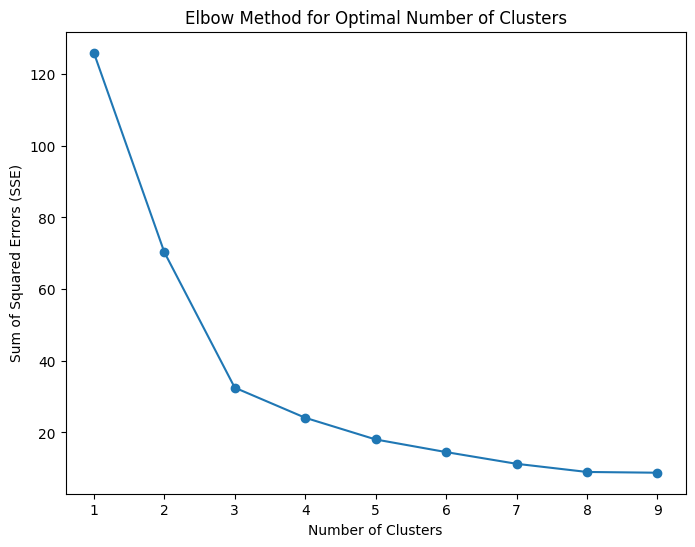

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

## K-Means Clustering


Apply K-Means Clustering and Calculate Silhouette Score

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

K-Means Silhouette Score: 0.56


Plot K-Means Clustering


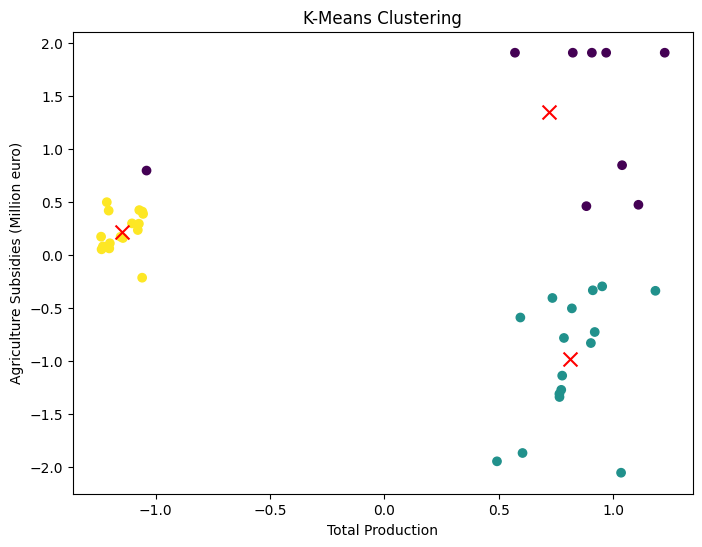

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Total_Production'], X['Agriculture_Subsidies(Million euro)'], c=kmeans_labels, cmap='viridis')
cluster_centers = kmeans.cluster_centers_
for i in range(cluster_centers.shape[0]):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=100, c='red', marker='x')
plt.title("K-Means Clustering")
plt.xlabel("Total Production")
plt.ylabel("Agriculture Subsidies (Million euro)")
plt.show()


## Hierarchical Clustering


Apply Hierarchical Clustering and Calculate Silhouette Score

In [7]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

Hierarchical Clustering Silhouette Score: 0.55


Plot Dendrogram for Hierarchical Clustering

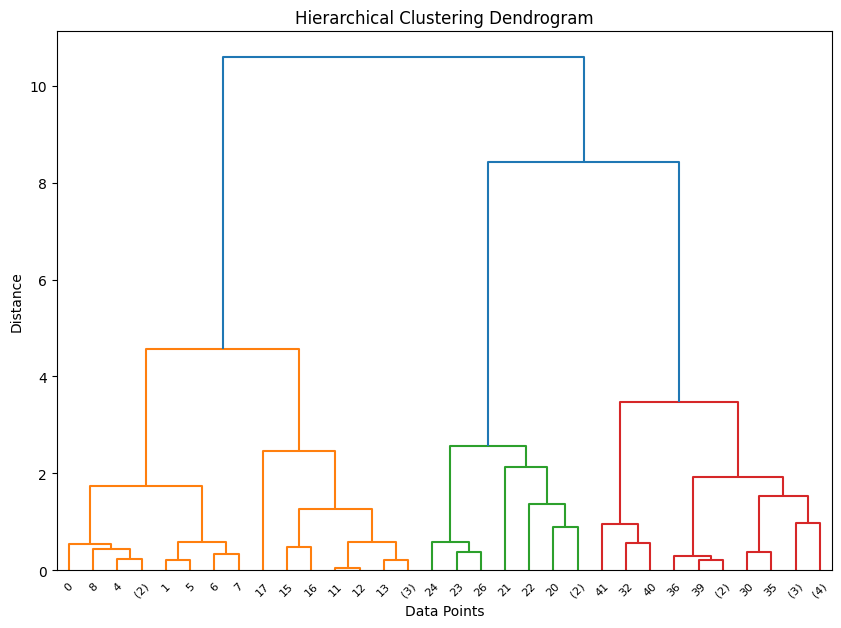

In [8]:
plt.figure(figsize=(10, 7))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Plot Hierarchical Clustering

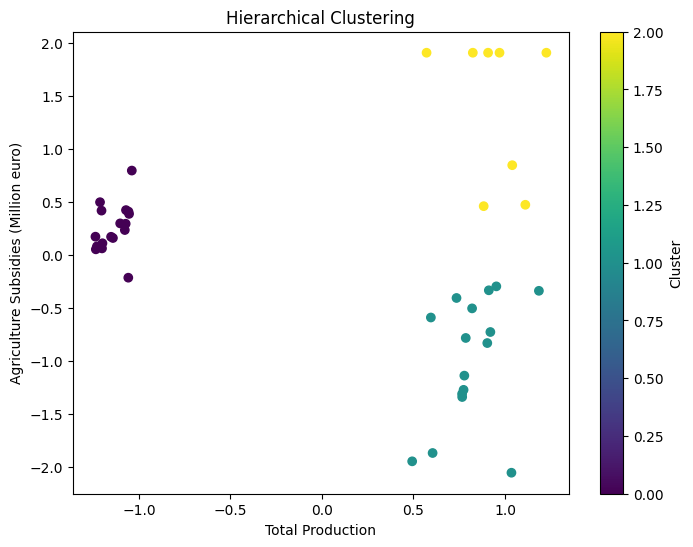

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Total_Production'], X['Agriculture_Subsidies(Million euro)'], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Total Production")
plt.ylabel("Agriculture Subsidies (Million euro)")
plt.colorbar(label="Cluster")
plt.show()


## Interpreting Results

Add the Cluster as a new column the result of K-means Clustering

In [10]:
df['Cluster'] = kmeans_labels

Features to compare


In [11]:
features = ['Total_Production', 'Agriculture_Subsidies(Million euro)', 'Agriculture_Economy(Million euro)']

Creating box plots for each cluster

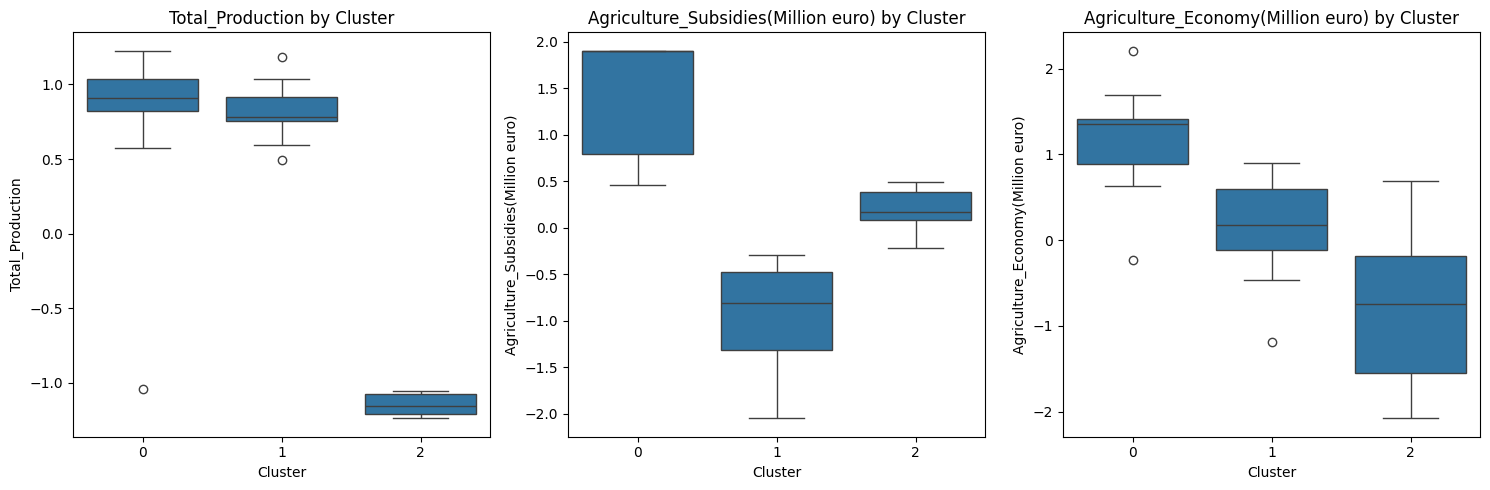

In [12]:
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

Comparing Mean Values of Features of each Clusters

In [13]:
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} Mean Values:")
    print(cluster_data[['Total_Production', 'Agriculture_Subsidies(Million euro)', 'Agriculture_Economy(Million euro)']].mean())
    print("\n")

Cluster 0 Mean Values:
Total_Production                       0.721688
Agriculture_Subsidies(Million euro)    1.343787
Agriculture_Economy(Million euro)      1.179958
dtype: float64


Cluster 1 Mean Values:
Total_Production                       0.814122
Agriculture_Subsidies(Million euro)   -0.982277
Agriculture_Economy(Million euro)      0.165955
dtype: float64


Cluster 2 Mean Values:
Total_Production                      -1.148303
Agriculture_Subsidies(Million euro)    0.213079
Agriculture_Economy(Million euro)     -0.780877
dtype: float64




Giving Interpretetion to Each Clusters

# Cluster 0

*   High Total_Production
*   High Agriculture_Subsidies
*   High Agriculture_Economy


# Cluster 1

*   High Total_Production
*   Low Agriculture_Subsidies
*   Moderate Agriculture_Economy

# Cluster 2

*   Low Total_Production
*   Moderate Agriculture_Subsidies
*   Low Agriculture_Economy